In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import time
import pandas as pd

service = Service()

# Selenium 웹 드라이버 시작
driver = webdriver.Chrome(service=service)

# 웹 페이지 열기
driver.get('https://ko.semrush.com/trending-websites/global/music')

# 페이지 로딩을 기다리기 위해 잠시 대기
time.sleep(3)

# 스크래핑한 링크를 추적하는 세트
scraped_links_a = set()

data = []


def print_all():
    alls = driver.find_elements(By.CSS_SELECTOR, '#open-trends > div > div:nth-child(3) > div > section')
    for all in alls:
        link_a = all.get_attribute('href')
        if link_a not in scraped_links_a:
            scraped_links_a.add(link_a)
            data.append(all.text)
            print(all.text)
load_more_button_a = driver.find_element(By.CSS_SELECTOR, '#open-trends > div > div:nth-child(3) > div > section > div.dWpoM7T_pxot7qnmadYT > button > span')
load_more_button_a.click()

load_more_button_a = driver.find_element(By.CSS_SELECTOR, '#open-trends > div > div:nth-child(3) > div > section > div.dWpoM7T_pxot7qnmadYT > button > span')
load_more_button_a.click()

load_more_button_a = driver.find_element(By.CSS_SELECTOR, '#open-trends > div > div:nth-child(3) > div > section > div.dWpoM7T_pxot7qnmadYT > button > span')
load_more_button_a.click()


while True:
    try:
        load_more_button_a = driver.find_element(By.CSS_SELECTOR, '#open-trends > div > div:nth-child(3) > div > section > div.dWpoM7T_pxot7qnmadYT > button > span')
        load_more_button_a.click() #open-trends > div > div:nth-child(3) > div > section > div.dWpoM7T_pxot7qnmadYT > button > span
        #open-trends > div > div:nth-child(3) > div > section > div.dWpoM7T_pxot7qnmadYT > button
        time.sleep(3)  # 버튼 클릭 후 데이터 로딩을 기다리기 위해 잠시 대기
        print_all() # 새로운 요소 출력
    except Exception as e:
        print("더 이상 'Load more' 버튼이 없습니다.")
        break

# 드라이버 종료
driver.quit()



# # 데이터프레임 출력


# 수집한 데이터를 데이터프레임으로 변환
df = pd.DataFrame(data, columns=['Text'])
print(df)
# 'Text' 열의 각 요소를 분리하여 리스트 생성
split_data = df['Text'].str.split('\n', expand=True)
display(split_data)


7월 2024
도메인
방문수
데스크톱 공유
모바일 공유
MoM
YoY
주요 트래픽 소스
S
spotify.com
725.07M
55.15%
399.88M
44.85%
325.19M
↑0.88% ↑3.84% 직접
A
amazon.de
604.36M
41.89%
253.18M
58.11%
351.18M
↑15.25% ↓8.98% 직접
S
soundcloud.com
172.64M
54.05%
93.31M
45.95%
79.33M
↑2.08% ↑6.59% 직접
T
ticketmaster.com
97.97M
33.85%
33.16M
66.15%
64.81M
↓8.83% ↓0.92% 직접
U
ultimate-guitar.com
90.48M
33.34%
30.16M
66.66%
60.32M
↑1.73% ↓8.1% 검색
L
letras.mus.br
54.73M
20.72%
11.34M
79.28%
43.39M
↓10.35% ↑9.7% 직접
L
last.fm
51.92M
32.91%
17.09M
67.09%
34.83M
↑1.17% ↓0.09% 직접
B
bandcamp.com
51.53M
37.63%
19.39M
62.37%
32.14M
↑1.88% ↓12.43% 직접
L
letras.com
50.53M
18.1%
9.14M
81.9%
41.39M
↑1.16% ↑23.53% 검색
D
discogs.com
47.69M
45.25%
21.58M
54.75%
26.11M
↓9.5% ↓22.16% 직접
R
rollingstone.com
37.36M
23.96%
8.95M
76.04%
28.41M
↑29.47% ↓30.53% 직접
R
rutracker.org
34.46M
85.54%
29.48M
14.46%
4.98M
↑0.16% ↓23.48% 직접
D
deezer.com
34.05M
34.87%
11.87M
65.13%
22.18M
↓3.53% ↑4.35% 직접
C
chordtela.com
30.21M
5.22%
1.58M
94.78%
28.63M
↑12.87% ↑23.89% 직접


,0,1,2,3,4,5,6,7,8,9,...,798,799,800,801,802,803,804,805,806,807
0,7월 2024,도메인,방문수,데스크톱 공유,모바일 공유,MoM,YoY,주요 트래픽 소스,S,spotify.com,...,4.58M,↓4% ↓20.52% 검색,M,mixkit.co,5.54M,53.04%,2.94M,46.96%,2.6M,↓3.19% ↓6.85% 직접


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data, columns=['Text'])
# print(df)

split_data = df['Text'].str.split('\n', expand=True)
# display(split_data)

st_data = split_data.drop(split_data.columns[0], axis=1)

# 모든 행을 출력
pd.set_option('display.max_rows', None)

# 모든 열을 출력
pd.set_option('display.max_columns', None)
# 결과 출력
# display(st_data)

# 8번째 열부터 데이터를 잘라서 새로운 행으로 변환
columns = st_data.columns
new_rows = []

# 8번째 열부터 8개씩 슬라이싱하여 새로운 행으로 추가
for start in range(7, len(columns), 8):
    new_row = st_data.iloc[0, start:start+8].values.tolist()
    new_rows.append(new_row)

# display(new_rows)
# 새로운 행들을 데이터프레임으로 변환
new_df = pd.DataFrame(new_rows, columns=columns[:8])
# display(new_df)
# 기존 데이터프레임에서 첫 7열을 추출
original_df = st_data.iloc[:, :7]

# 새로운 데이터프레임과 원본 데이터를 결합 (세로로)
result_df = pd.concat([original_df, new_df], ignore_index=True)


result_df.iloc[0] = ['이니셜'] + result_df.iloc[0].tolist()[:-1]

# 결과 출력
display(result_df)

,1,2,3,4,5,6,7,8
0,이니셜,도메인,방문수,데스크톱 공유,모바일 공유,MoM,YoY,주요 트래픽 소스
1,S,spotify.com,725.07M,55.15%,399.88M,44.85%,325.19M,↑0.88% ↑3.84% 직접
2,A,amazon.de,604.36M,41.89%,253.18M,58.11%,351.18M,↑15.25% ↓8.98% 직접
3,S,soundcloud.com,172.64M,54.05%,93.31M,45.95%,79.33M,↑2.08% ↑6.59% 직접
4,T,ticketmaster.com,97.97M,33.85%,33.16M,66.15%,64.81M,↓8.83% ↓0.92% 직접
5,U,ultimate-guitar.com,90.48M,33.34%,30.16M,66.66%,60.32M,↑1.73% ↓8.1% 검색
6,L,letras.mus.br,54.73M,20.72%,11.34M,79.28%,43.39M,↓10.35% ↑9.7% 직접
7,L,last.fm,51.92M,32.91%,17.09M,67.09%,34.83M,↑1.17% ↓0.09% 직접
8,B,bandcamp.com,51.53M,37.63%,19.39M,62.37%,32.14M,↑1.88% ↓12.43% 직접
9,L,letras.com,50.53M,18.1%,9.14M,81.9%,41.39M,↑1.16% ↑23.53% 검색


In [5]:
# df_split = result_df.columns[7].str.split(expand=True) # 이거는 안됨. 오류남.
df_split = result_df.iloc[:, 7].str.split(expand=True)

# 새로운 열 이름 설정
df_split.columns = ['MoM', 'YoY', '주요 트래픽 소스']

# 기존 데이터프레임에 새로운 열 추가
result_df = pd.concat([result_df, df_split], axis=1)
print("열을 분리한 후 데이터프레임:\n", result_df)

열을 분리한 후 데이터프레임:
        1                       2        3        4        5       6        7  \
0    이니셜                     도메인      방문수  데스크톱 공유   모바일 공유     MoM      YoY   
1      S             spotify.com  725.07M   55.15%  399.88M  44.85%  325.19M   
2      A               amazon.de  604.36M   41.89%  253.18M  58.11%  351.18M   
3      S          soundcloud.com  172.64M   54.05%   93.31M  45.95%   79.33M   
4      T        ticketmaster.com   97.97M   33.85%   33.16M  66.15%   64.81M   
5      U     ultimate-guitar.com   90.48M   33.34%   30.16M  66.66%   60.32M   
6      L           letras.mus.br   54.73M   20.72%   11.34M  79.28%   43.39M   
7      L                 last.fm   51.92M   32.91%   17.09M  67.09%   34.83M   
8      B            bandcamp.com   51.53M   37.63%   19.39M  62.37%   32.14M   
9      L              letras.com   50.53M    18.1%    9.14M   81.9%   41.39M   
10     D             discogs.com   47.69M   45.25%   21.58M  54.75%   26.11M   
11     R        rollin

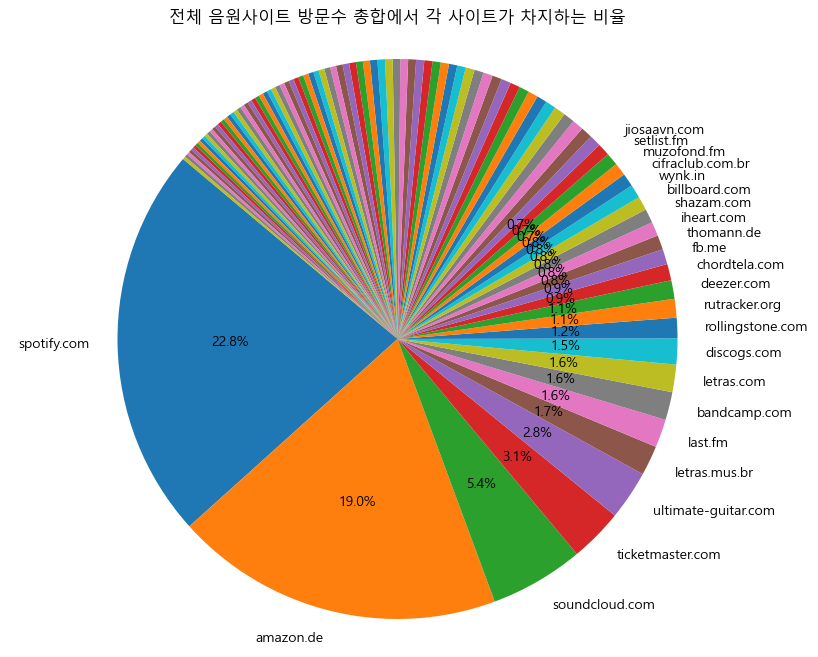

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import re


from matplotlib import font_manager, rc

# 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # "맑은 고딕" 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


# 숫자 부분만 추출하여 float로 변환
def extract_and_convert(value):
    if pd.isna(value):  # NaN 값 처리
        return 0
    # 숫자와 소수점만 남기고 문자 제거, 'M'을 1e6으로 변환, 'K'를 1e3으로 변환
    numeric_part = re.sub(r'[^\d.]', '', str(value))
    if 'M' in str(value):
        return float(numeric_part) * 1e6
    elif 'K' in str(value):
        return float(numeric_part) * 1e3
    return float(numeric_part)

# 3번째 열의 2행부터 100행까지 데이터 선택
column_index = 2
df_sub = result_df.iloc[1:, column_index]

# 숫자로 변환
df_sub_converted = df_sub.apply(extract_and_convert)

# 총합 계산
total_sum = df_sub_converted.sum()

# 비율 계산
percentages = df_sub_converted / total_sum

# 라벨 리스트 생성: 0.5% 이상인 경우에만 해당 데이터값을 라벨로 표시
labels = [result_df.iloc[i+1, 1] if percentages.iloc[i] >= 0.007 else '' for i in range(len(percentages))]

# 비율을 기반으로 파이 차트 그리기
plt.figure(figsize=(10, 8))

plt.pie(percentages[:99], labels=labels[:99], autopct=lambda p: f'{p:.1f}%' if p >= 0.7 else '', startangle=140)

plt.title('전체 음원사이트 방문수 총합에서 각 사이트가 차지하는 비율')
plt.axis('equal')  # 동그란 차트
plt.show()

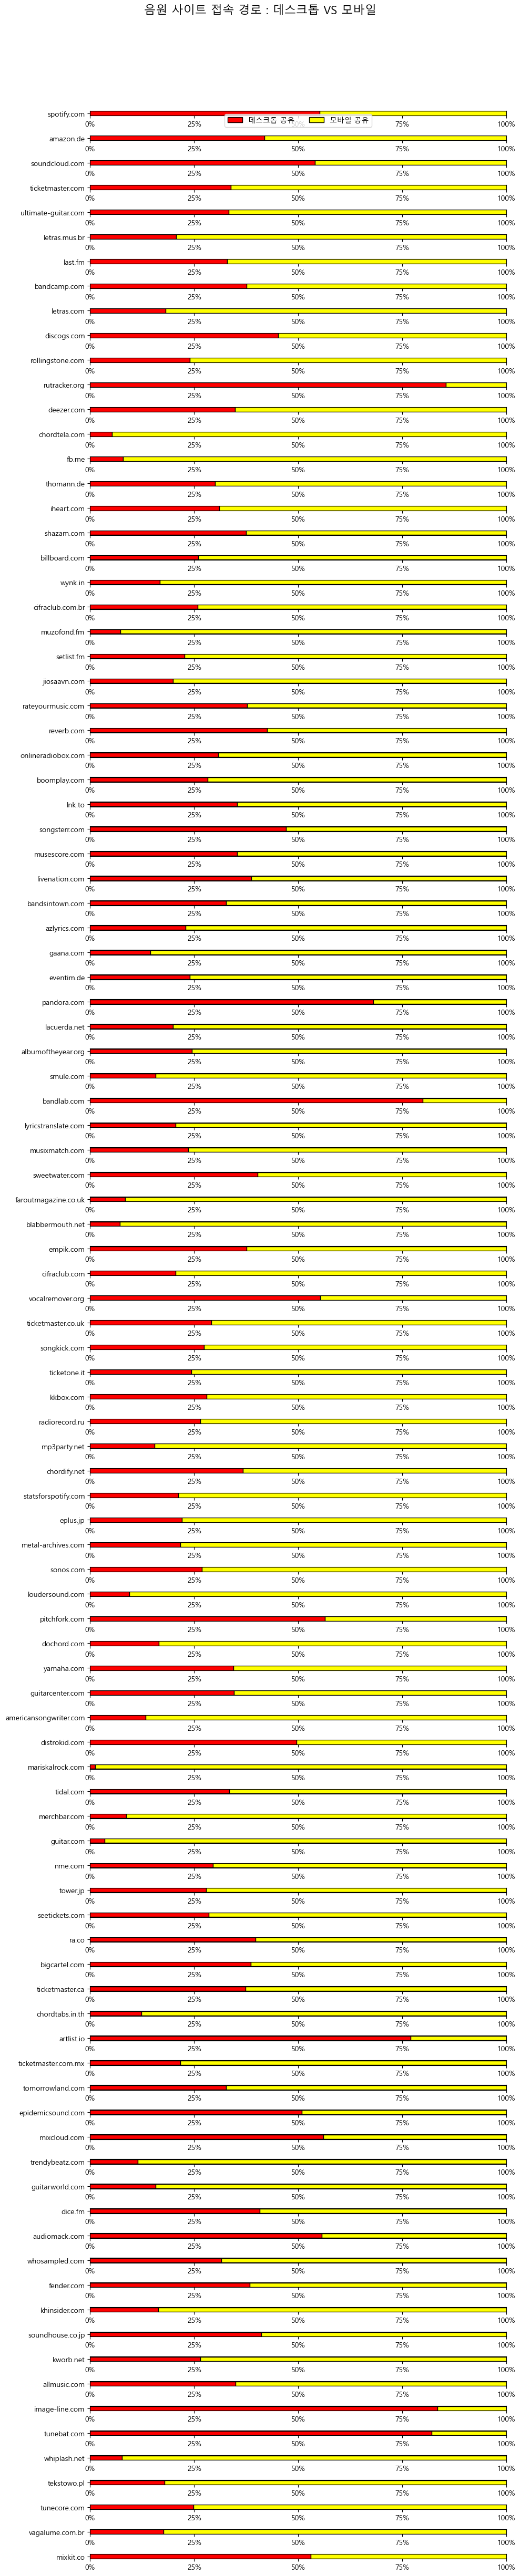

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # "맑은 고딕" 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 데이터프레임 준비
result_df = pd.concat([result_df, df_split], axis=1)

# 0행 제거
result_df = result_df.drop(index=0)

# 백분율 문자열 처리 - 문자열 데이터만 처리
result_df[4] = result_df[4].apply(lambda x: float(x.rstrip('%')) if isinstance(x, str) else x)
result_df[6] = result_df[6].apply(lambda x: float(x.rstrip('%')) if isinstance(x, str) else x)

# y축 레이블을 result_df의 2열 데이터로 설정
yticks_labels = result_df[2].iloc[0:len(result_df)].values

# 그래프 그리기
fig, axs = plt.subplots(nrows=len(result_df), ncols=1, figsize=(10, len(result_df) * 0.5))

for i in range(len(result_df)):
    axs[i].barh(yticks_labels[i], result_df[4].iloc[i], color='red', edgecolor='black', label='데스크톱 공유' if i == 0 else "")
    axs[i].barh(yticks_labels[i], result_df[6].iloc[i], color='yellow', edgecolor='black', left=result_df[4].iloc[i], label='모바일 공유' if i == 0 else "")
    axs[i].set_xlim(0, 100)  # 100%까지 보이도록 x축 범위 설정
    axs[i].set_xticks([0, 25, 50, 75, 100])  # x축 눈금 설정
    axs[i].set_xticklabels(['0%', '25%', '50%', '75%', '100%'])

# 전체 그래프 제목 추가
fig.suptitle('음원 사이트 접속 경로 : 데스크톱 VS 모바일', fontsize=16)

# 범례 추가
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # 제목과 겹치지 않도록 레이아웃 조정
plt.show()

### 참고 : 모델 만들기
### 데이터 수가 1개 밖에 없어서 예측은 안되지만 (MSE: 3205.8283197772616) 
###이런 과정을 통해서 최적의 파라미터를 찾아서 모델을 만드는 과정 보여주기

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import joblib


# 9번째 열의 데이터를 가져오기
yoy_data = result_df.loc[:,'MoM']

# 퍼센트와 숫자만 추출
yoy_data = yoy_data.str.extract(r'([+-]?\d+\.\d+|\d+)')[0].astype(float)
# print(yoy_data)

# 데이터 확인
# print("전처리된 9번째 열의 데이터:\n", yoy_data)


# y 변수 처리: 화살표, 퍼센트, 문자열 제거하고 숫자만 추출
y = result_df.loc[:,'YoY']  # y는 9번째 열이라고 가정
y = y.str.extract(r'([+-]?\d+\.\d+|\d+)')[0].astype(float)

y = y
# y = y.ravel()
X = yoy_data 

# 데이터 분할
if X.shape[0] > 0 and y.shape[0] > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    raise ValueError("X or y is empty. Check the data preprocessing steps.")

import numpy as np

# X_train을 numpy 배열로 변환 후 2D 배열로 reshape
X_train = np.array(X_train).reshape(-1, 1)

# y_train을 numpy 배열로 변환 후 2D 배열로 reshape (필요한 경우)
y_train = np.array(y_train).reshape(-1, 1)

# 랜덤포레스트 모델 정의
rf = RandomForestRegressor(random_state=42)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV를 통한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
# y_train = y_train.ravel()
# X_train = X_train.ravel()
# 최적의 파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

AttributeError: 'DataFrame' object has no attribute 'str'

In [10]:
import numpy as np

# 결측치가 없는 값만 선택 (Series일 경우)
mask = ~np.isnan(X_test)
X_test = X_test[mask]
y_test = y_test[mask]

# Series를 NumPy 배열로 변환 후 reshape 적용
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# 최적의 모델로 예측
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of the best model: ", mse)

# 모델 저장
joblib.dump(best_rf, 'best_random_forest_model.pkl')

# 모델 로드 예시
# best_rf = joblib.load('best_random_forest_model.pkl')

best_rf

NameError: name 'X_test' is not defined

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 예시로 사용될 기존 데이터
# 실제로는 'yoy_data'와 'y'를 기존 데이터로 대체합니다.
X = X_train = np.array(X_train).reshape(-1, 1)
y = y_train = np.array(y_train).reshape(-1, 1) 
y = y.ravel()# 특징 데이터 (2D 배열 형식)
  # 실제 트래픽 값 (1D 배열 형식)

# 기존 모델을 통해 예측을 수행하기 위해, 기존 데이터에서 학습한 모델을 사용합니다.
# 이미 학습된 모델을 불러옵니다 (예: best_rf)
best_rf = RandomForestRegressor(min_samples_leaf=4, min_samples_split=10, random_state=42)

# 모델을 학습시킵니다 (기존 데이터 사용)
best_rf.fit(X, y)

# 다음 해의 데이터를 예측하기 위해, 현재 데이터에서 예측 수행
# 일반적으로 예측을 위한 새로운 데이터를 생성하지만, 여기서는 기존 데이터를 사용합니다.
y_pred = best_rf.predict(X)

# 예측 결과 확인
print("다음 해의 예측된 트래픽 값:")
print(y_pred)

# 예측 성능 평가 (선택 사항)
mse = mean_squared_error(y, y_pred)
print("예측의 평균 제곱 오차 (MSE):", mse)

In [ ]:
# X와 y의 크기 확인
print("X shape:", X.shape)
print("y shape:", y.shape)

# 예측할 데이터 X_test의 크기 확인
print("X_test shape:", X_test.shape)

# 예측값의 개수 확인
print("Number of predictions:", len(y_pred))

# 실제 y_test와 예측값 y_pred의 크기 확인
print("y_test shape:", y_test.shape)

In [ ]:
echo "# -222" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/gogumagugo/-222.git
git push -u origin main